In [17]:
import sys
!{sys.executable} -m pip install scipy
import h5py
import numpy as np
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


# Open up and plot an ICESat-2 ATL06 elevation profile

(1460.0, 1490.0)

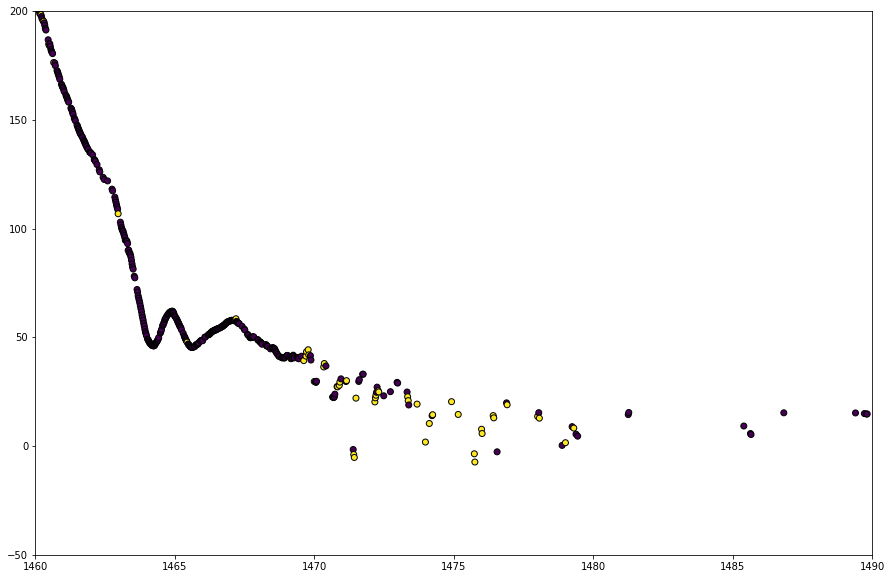

In [36]:
data = h5py.File('/data/fast0/ATL06/ATL06_20210619100821_13221112_004_01.h5')

heights = np.array( data['/gt1l/land_ice_segments/h_li'] )
x = np.array( data['/gt1l/land_ice_segments/ground_track/x_atc'] )
quality = np.array(data['/gt1l/land_ice_segments/atl06_quality_summary'])

fig,ax=plt.subplots(figsize=(15,10))
fig.patch.set_facecolor('white')
#plt.plot( (x-x[0])/1e3,heights,'-o')
plt.scatter( (x-x[0])/1e3,heights,c=quality,edgecolor='k')
plt.ylim([-50,200])
plt.xlim([1460,1490])

# FFT Using scipy?
Try applying this technique:  https://docs.scipy.org/doc/scipy/tutorial/fft.html

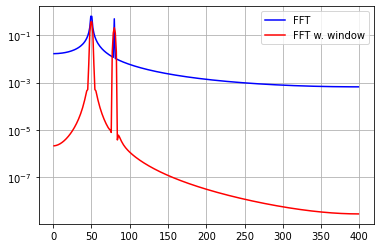

In [84]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

# Try looking at other data
1. Go to Open Altimetry https://openaltimetry.org/data/icesat2/
2. Pick another RGT (we first used 0569)
3. List all of the data using the command below

In [15]:
import glob
file_list = glob.glob("/data/*/*/*_1322*h5")
for file in file_list:
    print(file)

/data/fast0/ATL06/ATL06_20210320132200_13221002_004_01.h5
/data/fast0/ATL06/ATL06_20210320133030_13221003_004_01.h5
/data/fast0/ATL06/ATL06_20210320133555_13221004_004_01.h5
/data/fast0/ATL06/ATL06_20210320134104_13221005_004_01.h5
/data/fast0/ATL06/ATL06_20210320134629_13221006_004_01.h5
/data/fast0/ATL06/ATL06_20210320135459_13221007_004_01.h5
/data/fast0/ATL06/ATL06_20210320140201_13221008_004_01.h5
/data/fast0/ATL06/ATL06_20210320141506_13221010_004_01.h5
/data/fast0/ATL06/ATL06_20210320142246_13221011_004_01.h5
/data/fast0/ATL06/ATL06_20210320142830_13221012_004_01.h5
/data/fast0/ATL06/ATL06_20210619090151_13221102_004_01.h5
/data/fast0/ATL06/ATL06_20210619091021_13221103_004_01.h5
/data/fast0/ATL06/ATL06_20210619091546_13221104_004_01.h5
/data/fast0/ATL06/ATL06_20210619092056_13221105_004_01.h5
/data/fast0/ATL06/ATL06_20210619092621_13221106_004_01.h5
/data/fast0/ATL06/ATL06_20210619093451_13221107_004_01.h5
/data/fast0/ATL06/ATL06_20210619095457_13221110_004_01.h5
/data/fast0/AT

/home/acdealy/.local/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/acdealy/.local/lib/python3.9/site-packages/scipy/signal/spectral.py:1911: RuntimeWarning: invalid value encountered in multiply
  result = win * result


(0.0, 0.1)

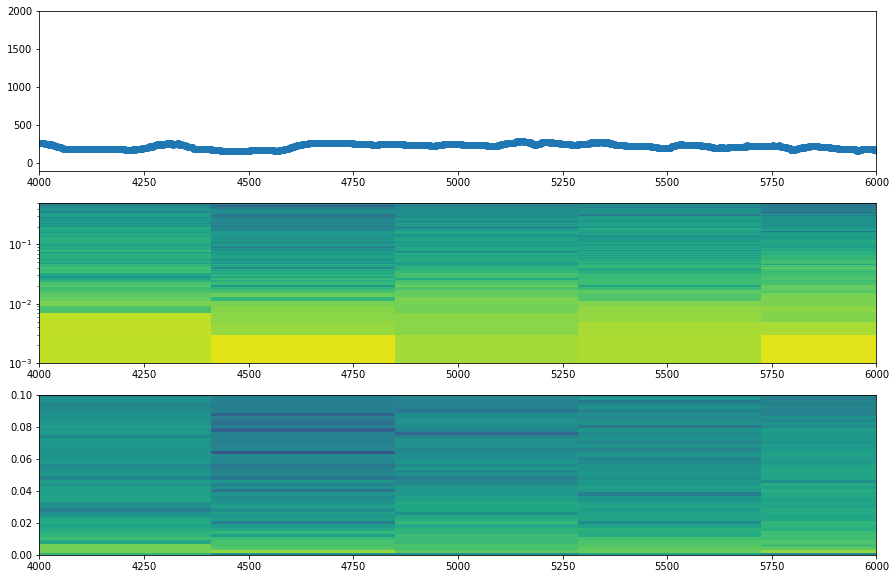

In [11]:
from scipy.signal import spectrogram

f,t,s = spectrogram(heights,nperseg=500)

fig,ax = plt.subplots(figsize = (15,10))
ax=plt.subplot(3,1,1)
ax.plot(heights,'-o')
ax.set_ylim((-100,2000))
ax.set_xlim((4000,6000))

ax=plt.subplot(3,1,2)
c = ax.pcolormesh(t,f,np.log10(s))
#plt.colorbar(c)
plt.xlim((4000,6000))
plt.yscale("log")
plt.ylim((1e-3,0.5))

ax=plt.subplot(3,1,3)
c = ax.pcolormesh(t,f,np.log10(s),vmin=-5,vmax=8)
#plt.colorbar(c)
plt.xlim((4000,6000))
#plt.yscale("log")
plt.ylim((0,0.1))

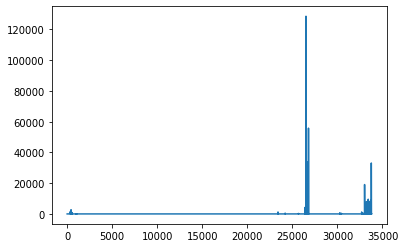

In [130]:
plt.plot(np.diff(x))

In [152]:
heights

array([-1.231565 , -1.3885508, -1.5929374, ..., 11.346191 , 11.342001 ,
       11.077838 ], dtype=float32)